<a href="https://colab.research.google.com/github/EVA6-Group-15/adder_network/blob/master/MNIST_RandomNumber.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Memory Information

### Checking The Memory Details

In [1]:
import psutil
def get_size(bytes, suffix="B"):
    factor = 1024
    for unit in ["", "K", "M", "G", "T", "P"]:
        if bytes < factor:
            return f"{bytes:.2f}{unit}{suffix}"
        bytes /= factor
print("="*40, "Memory Information", "="*40)
svmem = psutil.virtual_memory()
print(f"Total: {get_size(svmem.total)}") ; print(f"Available: {get_size(svmem.available)}")
print(f"Used: {get_size(svmem.used)}") ; print(f"Percentage: {svmem.percent}%")

======================================== Memory Information ========================================
Total: 12.69GB
Available: 11.88GB
Used: 543.45MB
Percentage: 6.3%


# GPU Information

### Checking GPU Infor

In [2]:
! nvidia-smi

Fri May 21 06:26:22 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   53C    P8    11W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

# Dataset Creation using MNIST Data and Random Number - Basic Iteration
Here the Data is first Created, by giving the MNIST Image and The Random Number. The final objective of Sum is not being implemented yet.

First trying to check, if model can predict MINST Image Number and Random Number separately.

In [3]:
import torch
import torchvision
import torchvision.transforms as transforms

torch.manual_seed(1)

### Downloading MNIST Data

In [4]:
train_set = torchvision.datasets.MNIST(
    root='./MNISTdata'
    ,train=True #Training Data of 60k Images
    ,download=True
)

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNISTdata/MNIST/raw/train-images-idx3-ubyte.gz to ./MNISTdata/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNISTdata/MNIST/raw/train-labels-idx1-ubyte.gz to ./MNISTdata/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNISTdata/MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNISTdata/MNIST/raw

Failed to download (trying next):
HTTP Error 503: Service Unavailable




Extracting ./MNISTdata/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNISTdata/MNIST/raw

Processing...
Done!


/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:502: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:143.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


### Creating MNIST + Random Number Dataset Class

In [5]:
from torch.utils.data import Dataset, DataLoader
import random, math

class MNISTRandomNumber(Dataset):
    '''
    Take MNIST Data Set for eith Train or Test Images.
    Performs provided trasnformations on the MNIST Data
    Generates a Random Number between 0 and 9
    Creates a One Hot Encoded Vector of the Random Number generated.

    Returns:
        image : The MNIST Trasnformed Image
        ohv_num : The One Hot encoded vector of the Random Number
        label : The MNIST Image Label
        number: The Random Number generated label.
    '''
    def __init__(self, MNIST_data, transformations):
        self.MNIST = MNIST_data
        self.transformations = transformations
    
    def __getitem__(self, index):
        image, label = self.MNIST[index]
        number = random.randint(0,9) #Genrating Random Number
        image = self.transformations(image)
        ohv_num = torch.zeros(10)
        ohv_num[number] = 1

        # Returning -> Inputs, Labels
        # Data -> ImageData, RandomNumberVector
        # Labels -> ImageLabel, RandomNumber 
        return ((image,ohv_num), (label,number))

    def __len__(self):
        return len(self.MNIST)


### Creating Training Data Set and Data Loader

In [6]:
trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.1307,),(0.3081,)), # Mean and Standard Deviation 
                            ])
train_set = MNISTRandomNumber(train_set, trans)

In [7]:
train_loader = DataLoader(train_set, batch_size=256, shuffle=True, num_workers=2,
                          pin_memory=True, drop_last=True)

#### Plotting Few Images from Training Set

tensor([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.])
9
6


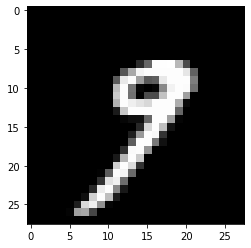

In [8]:
import matplotlib.pyplot as plt
data = train_set[33]
plt.imshow(data[0][0].squeeze(), cmap='gray')
print(data[0][1])
print(data[1][0])
print(data[1][1])

#### Data Loader Shapes and Grid Images



In [9]:
sample = next(iter(train_loader))

In [10]:
input, label = sample

In [11]:
image, num = input
image_lab, num_lab = label

In [12]:
image.shape, num.shape, image_lab.shape, num_lab.shape

(torch.Size([256, 1, 28, 28]),
 torch.Size([256, 10]),
 torch.Size([256]),
 torch.Size([256]))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


labels: tensor([6, 1, 4, 0, 7, 1, 8, 9, 0, 1, 2, 4, 2, 5, 9, 3, 9, 5, 1, 4, 1, 1, 3, 3,
        2, 4, 3, 7, 8, 8])


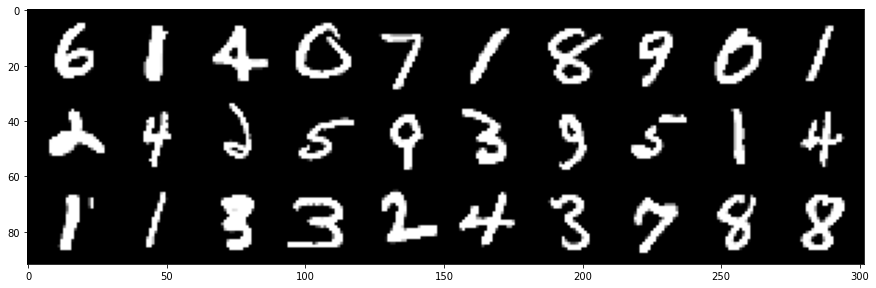

In [13]:
import numpy as np

grid = torchvision.utils.make_grid(image[:30], nrow=10)
plt.figure(figsize=(15,15))
# Torch Has Channel x Width x Heigth
# Coverting it to Width x Heigth x Channels using Transpose
plt.imshow(np.transpose(grid, (1,2,0))) 
print('labels:', image_lab[:30])

### Creating Test Data set and Test Data Loader

In [14]:
test_set = torchvision.datasets.MNIST(
    root='./MNISTdata'
    ,train=False # Test Data of 10k Images
    ,download=True
)

In [15]:
trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.1307,),(0.3081,)), # Mean and Standard Deviation
                            ])
test_set = MNISTRandomNumber(test_set, trans)

In [16]:
test_loader = DataLoader(test_set, batch_size=256, num_workers=2,
                          pin_memory=True, drop_last=True)

# Why pin_memory?
# When loading samples in the Dataset on CPU and pushing it to GPU when training.
# pin memory will let the DataLoader allocate the samples in page-locked memory, which speeds-up the transfer.

In [17]:
print('Random Number Input\n',num[:5])
print('Labels: ', num_lab[:5])

Random Number Input
 tensor([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])
Labels:  tensor([7, 8, 5, 9, 0])


# Building Network - Basic Iteration

The Netwrok will take two Inputs:
*   Input 1 -> MNIST Image 28x28 Grayscale
*   Input 2 -> One Hot Encoded Tensor of Random Number

The Input 1 is a pure Convolutional model, where the MNIST image is being run through several convoplutions and max pool operations, bring image size from 28x28 to 1x10 values.

The Input 2 Image is being run through a linear model, with 3 fully connected layers.


In [18]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()
        self.layer1 = nn.Linear(10,20,bias=False)
        self.layer2 = nn.Linear(20,100,bias=False)
        self.layer3 = nn.Linear(100,10,bias=False)

        self.conv1 = nn.Conv2d(1, 16, 3, padding=1) # 28x28x1 -> 28x28x16
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 28x28x1 -> 28x28x32
        self.pool1 = nn.MaxPool2d(2,2) # 28x28x32 -> 14x14x32
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 14x14x32 -> 14x14x64
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1) # 14x14x64 -> 14x14x64
        self.pool2 = nn.MaxPool2d(2,2) # 14x14x64 -> 7x7x64
        self.conv5 = nn.Conv2d(64, 128, 3) # 7x7x64 -> 5x5x128
        self.conv6 = nn.Conv2d(128, 256, 3) # 5x5x128 -> 3x3x256
        self.conv7 = nn.Conv2d(256, 10, 3) # 3x3x10 -> 1x1x10

    def forward(self, x, y):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        x = self.conv7(x)
        x = x.view(-1, 10)

        y = self.layer1(y)
        y = self.layer2(y)
        y = self.layer3(y)
        y = y.view(-1, 10)

        return F.log_softmax(x, dim=1), F.log_softmax(y, dim=1)

### Train and Test 







Train - The **train** takes the train data loader, and run the batches on model, and also calculating gradients of weights, and doing back propogation from loss.



*The Loss being used here is Negative Log Likelihood. Why Log likelihood and why
negative?*

*The log function goes from very small values for small input to very very large towards infinite as the input value increases. The negative of that is the value is infinite when input is zero, and reduces to very very low values (towards zero) when the input increases.*

*Since, our log_softmax give higher and higher values to the correct prediction, and very low values if the prediction is off by very much.  *

*We know that loss function is happy when value is low and unhappy when value is high.  
The NLL becomes unhappy when there is wrong predictions and give a high value, where as when the prediction is correct it becomes happy and give a low value.*

*Ref Image: https://pbs.twimg.com/media/DnI-aQ5V4AEIOYt?format=jpg&name=large*

Test - The **test** takes the test data loader and run the trained model after every epoch, to check the results and find accuracy on UNSEEN data, which was never leaked or shown to the model during training.

In [19]:
import torch.optim as optim
from tqdm import tqdm

def train(model, train_loader, optimizer):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        img, lab = data[0].to('cuda'), target[0].to('cuda')
        num, tnum = data[1].to('cuda'), target[1].to('cuda')
        optimizer.zero_grad()
        output = model(img, num)
        loss1 = F.nll_loss(output[0], lab) #MNIST Loss
        loss2 = F.nll_loss(output[1], tnum) # Random Number Loss
        loss = loss1 + loss2
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')

def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct_img = 0
    correct_num = 0
    with torch.no_grad():
        for data, target in test_loader:
            img, lab = data[0].to('cuda'), target[0].to('cuda')
            num, tnum = data[1].to('cuda'), target[1].to('cuda')
            output = model(img, num)
            loss1 = F.nll_loss(output[0], lab) #MNIST Loss
            loss2 = F.nll_loss(output[1], tnum) # Random Number Loss
            loss = loss1 + loss2
            test_loss += loss
            pred1 = output[0].argmax(dim=1, keepdim=True)
            correct_img += pred1.eq(lab.view_as(pred1)).sum().item()
            pred2 = output[1].argmax(dim=1, keepdim=True)
            correct_num += pred2.eq(tnum.view_as(pred2)).sum().item()

        test_loss /= len(test_loader)

        print('\nTest set: Average loss: {:.4f}, Accuracy1: {}/{} ({:.0f}%), Accuracy2: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct_img, len(test_loader.dataset),
        100. * correct_img / len(test_loader.dataset),
        correct_num, len(test_loader.dataset),
        100. * correct_num / len(test_loader.dataset)))

### Running for 2 Epochs

SGD Optimizer being used

In [20]:
model = Network().to('cuda')
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 3):
    train(model, train_loader, optimizer)
    test(model, test_loader)

  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.1703, Accuracy1: 9537/10000 (95%), Accuracy2: 9984/10000 (100%)



loss=0.16290603578090668 batch_id=233: 100%|██████████| 234/234 [00:10<00:00, 22.24it/s]



Test set: Average loss: 0.0878, Accuracy1: 9737/10000 (97%), Accuracy2: 9984/10000 (100%)



### Manual Validation
Checking for 30 Images from Test Data Loader and Running them on the trained Model, to see if the predicted classes are same as the ground truth labels. 

In [21]:
sample = next(iter(train_loader))
input, labels = sample
image, inp_num= input
img_label, num_label = labels

output = model(image.to('cuda'), inp_num.to('cuda'))
pred1 = output[0].argmax(dim=1)
pred2 = output[1].argmax(dim=1)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


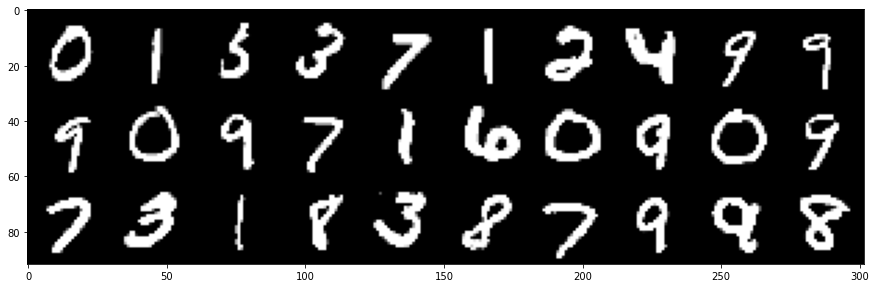

In [22]:
grid = torchvision.utils.make_grid(image[:30], nrow=10)
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

In [23]:
print('Ground Truth labels:', img_label[:30])
print('Predicted labels:', pred1[:30])

print('Ground Truth Number:', num_label[:30])
print('Predicted Number:', pred2[:30])

Ground Truth labels: tensor([0, 1, 5, 3, 7, 1, 2, 4, 9, 9, 9, 0, 9, 7, 1, 6, 0, 9, 0, 9, 7, 3, 1, 8,
        3, 8, 7, 9, 9, 8])
Predicted labels: tensor([0, 1, 5, 3, 7, 1, 2, 4, 9, 9, 9, 0, 9, 7, 1, 6, 0, 9, 0, 9, 7, 3, 1, 8,
        3, 8, 7, 9, 9, 8], device='cuda:0')
Ground Truth Number: tensor([3, 8, 0, 0, 7, 3, 4, 5, 2, 5, 6, 2, 8, 4, 0, 5, 5, 7, 0, 0, 9, 0, 2, 4,
        7, 2, 1, 5, 6, 1])
Predicted Number: tensor([3, 8, 0, 0, 7, 3, 4, 5, 2, 5, 6, 2, 8, 4, 0, 5, 5, 7, 0, 0, 9, 0, 2, 4,
        7, 2, 1, 5, 6, 1], device='cuda:0')


# Final Objective:

A neural network that can:
* Take two inputs:
    * an image from MNIST dataset, and
    * a random number between 0 and 9
* Gives two outputs:
    * the "number" that was represented by the MNIST image, and
    * the "sum" of this number with the random number that was generated and sent as the input to the network

## Creating Dataset for Outputting MNIST Prediction and Sum of MNIST and Random Number

In [24]:
from torch.utils.data import Dataset, DataLoader
import random, math

class MNISTRandomNumber(Dataset):
    '''
    Take MNIST Data Set for eith Train or Test Images.
    Performs provided trasnformations on the MNIST Data
    Generates a Random Number between 0 and 9
    Creates a One Hot Encoded Vector of the Random Number generated.

    Returns:
        image : The MNIST Trasnformed Image
        ohv_num : The One Hot encoded vector of the Random Number
        label : The MNIST Image Label
        number: The SUM of MNIST Label and Random Number generated label.
    '''
    def __init__(self, MNIST_data, transformations):
        self.MNIST = MNIST_data
        self.transformations = transformations
    
    def __getitem__(self, index):
        image, label = self.MNIST[index]
        number = random.randint(0,9)
        image = self.transformations(image)
        ohv_num = torch.zeros(10)
        ohv_num[number] = 1
        
        # Returning -> Inputs, Labels
        # Data -> ImageData, RandomNumberVector
        # Labels -> ImageLabel, sum(ImageLabel, RandomNumber) 

        return ((image,ohv_num), (label,number+label))

    def __len__(self):
        return len(self.MNIST)

## Building Final Model

This model will now output the MNIST output, and the sum of the number predicted by MNIST and the Random Number, which is the final objective.

In [25]:
import torch.nn as nn
import torch.nn.functional as F

class Network(nn.Module):
    def __init__(self):
        super(Network, self).__init__()

        self.conv1 = nn.Conv2d(1, 16, 3, padding=1) # 28x28x1 -> 28x28x16
        self.conv2 = nn.Conv2d(16, 32, 3, padding=1) # 28x28x1 -> 28x28x32
        self.pool1 = nn.MaxPool2d(2,2) # 28x28x32 -> 14x14x32
        self.conv3 = nn.Conv2d(32, 64, 3, padding=1) # 14x14x32 -> 14x14x64
        self.conv4 = nn.Conv2d(64, 64, 3, padding=1) # 14x14x64 -> 14x14x64
        self.pool2 = nn.MaxPool2d(2,2) # 14x14x64 -> 7x7x64
        self.conv5 = nn.Conv2d(64, 128, 3) # 7x7x64 -> 5x5x128
        self.conv6 = nn.Conv2d(128, 256, 3) # 5x5x128 -> 3x3x256
        self.conv7 = nn.Conv2d(256, 10, 3) # 3x3x10 -> 1x1x10

        self.layer1 = nn.Linear(20,50,bias=False)
        self.layer2 = nn.Linear(50,100,bias=False)
        self.layer3 = nn.Linear(100,19,bias=False)

    def forward(self, x, y):
        x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(x)))))
        x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
        x = F.relu(self.conv6(F.relu(self.conv5(x))))
        x = self.conv7(x)
        x = x.view(-1, 10)

        y = torch.cat((x,y),dim=1) #Horizontal Stacking. 1x10 and 1x10 -> 1x20


        y = self.layer1(y)
        y = self.layer2(y)
        y = self.layer3(y)

        return F.log_softmax(x, dim=1), F.log_softmax(y, dim=1) 

## Loading Datasets Creating Data Loaders

In [26]:
trans = transforms.Compose([transforms.ToTensor(),
                            transforms.Normalize((0.1307,),(0.3081,)),
                            ])

train_set = torchvision.datasets.MNIST(
    root='./MNISTdata'
    ,train=True
    ,download=True
)

train_set = MNISTRandomNumber(train_set, trans)

train_loader = DataLoader(train_set, batch_size=256, shuffle=True, num_workers=2,
                          pin_memory=True, drop_last=True)

test_set = torchvision.datasets.MNIST(
    root='./MNISTdata'
    ,train=False
    ,download=True
)

test_set = MNISTRandomNumber(test_set, trans)

test_loader = DataLoader(test_set, batch_size=256, num_workers=2,
                          pin_memory=True, drop_last=True)

In [27]:
model = Network().to('cuda')

sample = next(iter(train_loader))
input, labels = sample
image, inp_num= input
img_label, num_label = labels

output = model(image.to('cuda'), inp_num.to('cuda'))
pred = output[0].argmax(dim=1)

## Defining Train and Test Functions

These functions are similar to above Train and Test Functions

In [28]:
import torch.optim as optim
from tqdm import tqdm

def train(model, train_loader, optimizer):
    model.train()
    pbar = tqdm(train_loader)
    for batch_idx, (data, target) in enumerate(pbar):
        img, lab = data[0].to('cuda'), target[0].to('cuda')
        num, tnum = data[1].to('cuda'), target[1].to('cuda')
        optimizer.zero_grad()
        output = model(img, num)
        loss1 = F.nll_loss(output[0], lab)
        loss2 = F.nll_loss(output[1], tnum)
        loss = loss1 + loss2
        loss.backward()
        optimizer.step()
        pbar.set_description(desc= f'loss={loss.item()} batch_id={batch_idx}')

def test(model, test_loader):
    model.eval()
    test_loss = 0
    correct_img = 0
    correct_num = 0
    with torch.no_grad():
        for data, target in test_loader:
            img, lab = data[0].to('cuda'), target[0].to('cuda')
            num, tnum = data[1].to('cuda'), target[1].to('cuda')
            output = model(img, num)
            loss1 = F.nll_loss(output[0], lab)
            loss2 = F.nll_loss(output[1], tnum)
            loss = loss1 + loss2
            test_loss += loss
            pred1 = output[0].argmax(dim=1, keepdim=True)
            correct_img += pred1.eq(lab.view_as(pred1)).sum().item()
            pred2 = output[1].argmax(dim=1, keepdim=True)
            correct_num += pred2.eq(tnum.view_as(pred2)).sum().item()

        test_loss /= len(test_loader)

        print('\nTest set: Average loss: {:.4f}, Accuracy1: {}/{} ({:.0f}%), Accuracy2: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct_img, len(test_loader.dataset),
        100. * correct_img / len(test_loader.dataset),
        correct_num, len(test_loader.dataset),
        100. * correct_num / len(test_loader.dataset)))

## Training
**For 15 Epochs**

In [29]:
model = Network().to('cuda')
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

for epoch in range(1, 16):
    train(model, train_loader, optimizer)
    test(model, test_loader)

  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 2.4936, Accuracy1: 9517/10000 (95%), Accuracy2: 1500/10000 (15%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 1.6855, Accuracy1: 9809/10000 (98%), Accuracy2: 3540/10000 (35%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 1.3042, Accuracy1: 9839/10000 (98%), Accuracy2: 4987/10000 (50%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 1.1403, Accuracy1: 9864/10000 (99%), Accuracy2: 5716/10000 (57%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.9780, Accuracy1: 9884/10000 (99%), Accuracy2: 6714/10000 (67%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.9152, Accuracy1: 9895/10000 (99%), Accuracy2: 6896/10000 (69%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.7726, Accuracy1: 9909/10000 (99%), Accuracy2: 7587/10000 (76%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.7329, Accuracy1: 9928/10000 (99%), Accuracy2: 7948/10000 (79%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.6793, Accuracy1: 9916/10000 (99%), Accuracy2: 8371/10000 (84%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.6056, Accuracy1: 9916/10000 (99%), Accuracy2: 8418/10000 (84%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.5733, Accuracy1: 9917/10000 (99%), Accuracy2: 8737/10000 (87%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.5729, Accuracy1: 9911/10000 (99%), Accuracy2: 8586/10000 (86%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.5704, Accuracy1: 9927/10000 (99%), Accuracy2: 8717/10000 (87%)



  0%|          | 0/234 [00:00<?, ?it/s]


Test set: Average loss: 0.5485, Accuracy1: 9928/10000 (99%), Accuracy2: 9046/10000 (90%)



loss=0.42605510354042053 batch_id=233: 100%|██████████| 234/234 [00:10<00:00, 22.33it/s]



Test set: Average loss: 0.4673, Accuracy1: 9932/10000 (99%), Accuracy2: 9211/10000 (92%)



## Results

MNIST Accuracy -> **99.24%**

MNIST + Random Number SUM Accuracy -> **92.5%**

### Validation using one random image from Test Loader

In [30]:
inputs, labels = next(iter(test_loader))
img, rando = inputs
lab, sum = labels

output = model(img.to('cuda'), rando.to('cuda'))
pred1 = output[0].argmax(dim=1, keepdim=True)
pred2 = output[1].argmax(dim=1, keepdim=True)

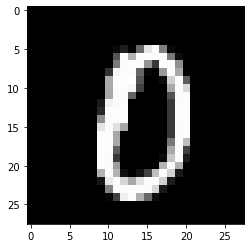

In [31]:
import matplotlib.pyplot as plt

some_random = random.randint(0,256)

plt.imshow(img[some_random].squeeze(), cmap='gray')

In [32]:
print('Ground Truth MNIST: ', lab[some_random])
print('Predicted MNIST: ', pred1[some_random])

Ground Truth MNIST:  tensor(0)
Predicted MNIST:  tensor([0], device='cuda:0')


In [33]:
print('Random Number: ', rando[some_random].argmax(dim=0).item())
print('Ground Truth MNIST: ', lab[some_random])
print('Ground Truth Random Number + MNIST: ', sum[some_random])
print('Predicted Random Number + MNIST: ', pred2[some_random])

Random Number:  0
Ground Truth MNIST:  tensor(0)
Ground Truth Random Number + MNIST:  tensor(0)
Predicted Random Number + MNIST:  tensor([0], device='cuda:0')


# ALL GOOD!

# Visualizing Model

In [34]:
!pip3 install graphviz
!pip3 install hiddenlayer

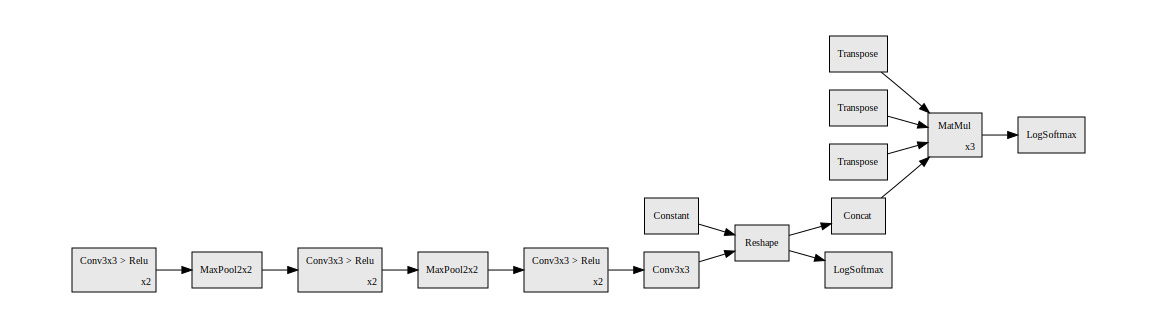

In [35]:
import hiddenlayer as hl
hl.build_graph(model, (torch.zeros([1, 1, 28, 28]).to('cuda'), torch.zeros(1,10).to('cuda')))